In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
import plotly.express as px

#nicer defaults for plots 
plt.rcParams["figure.figsize"] = (8, 5) # rcParams is a dictionary that control the fig sizes globally 8 inches wide and 5 inches tall (larger than default)
plt.rcParams['axes.grid'] = True        #always shows a grid on a graph

#load titanic dataset

titanic = sns.load_dataset('titanic')

# light tidy: cast categories, drop obvious junk columns if needed

cat_cols = ['sex', 'class', 'embark_town', 'who', 'adult_male', 'alive', 'alone', 'deck', 'embarked'] #all of the columns that are type category
#loop through the columns to change them from object to category (this saves memory, increses speed) object is default in seaborn
for col in cat_cols:
    if col in titanic.columns:
        titanic[col] = titanic[col].astype("category")

titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


C:\Users\tb975\AppData\Local\Temp\ipykernel_7924\3100972276.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_class = titanic.groupby('class')['survived'].mean().sort_values(ascending=False)


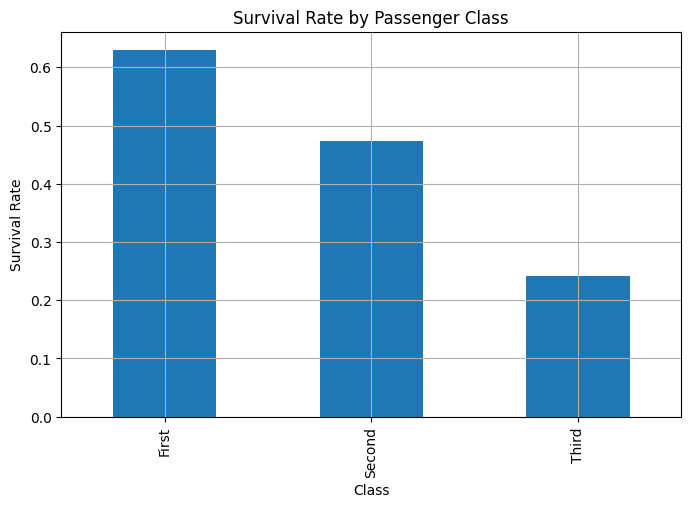

In [3]:
survival_by_class = titanic.groupby('class')['survived'].mean().sort_values(ascending=False)
ax = survival_by_class.plot(kind='bar')
ax.set_title('Survival Rate by Passenger Class')
ax.set_ylabel('Survival Rate')
ax.set_xlabel('Class')
plt.show()

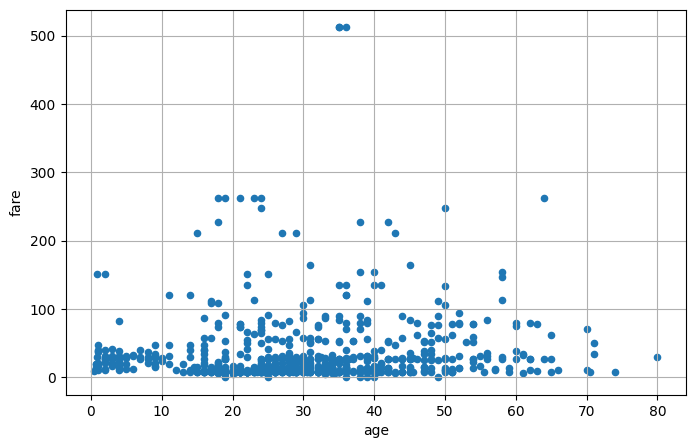

In [4]:
#Make a scatter plot of age vs fare MY VERSION
titanic.plot(kind='scatter', x='age', y='fare')
plt.show()



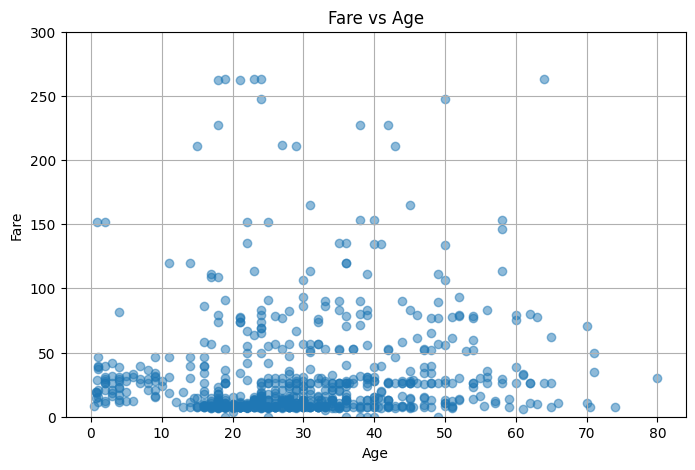

In [5]:
#spencers version

df = titanic.dropna(subset=['age', 'fare'])
plt.scatter(df['age'], df['fare'], alpha=0.5)
plt.title("Fare vs Age")
plt.xlabel('Age')
plt.ylabel('Fare')
plt.ylim(0, 300)
plt.show()

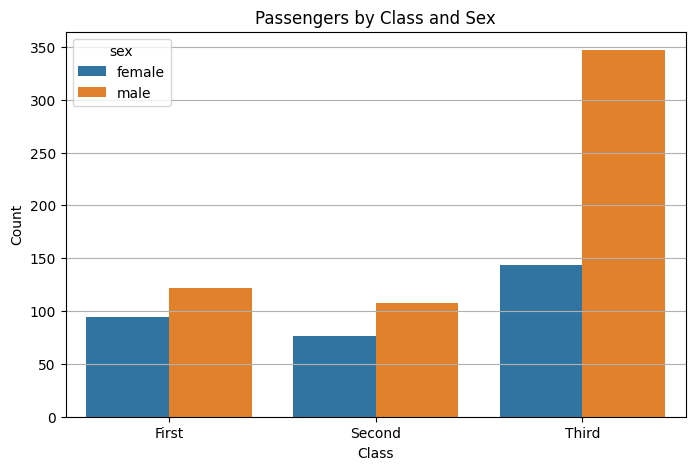

In [6]:
#class against number of passengers, divided by sex, using hue
sns.countplot(data=titanic, x='class', hue='sex')
plt.title('Passengers by Class and Sex')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

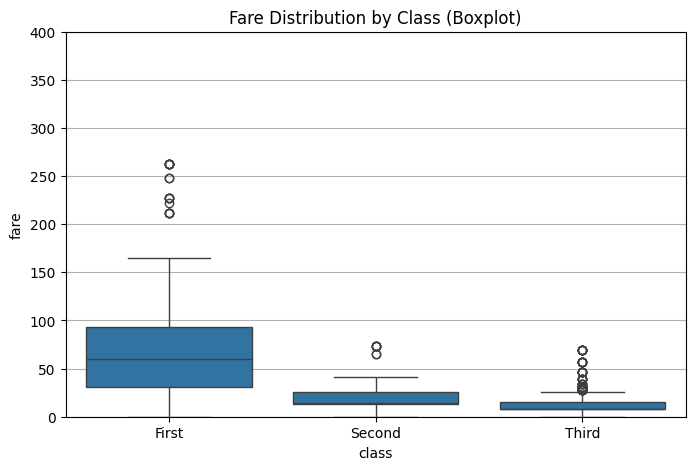

In [ ]:
#boxplot helps us to spot outliers

sns.boxplot(data=titanic, x='class', y='fare')
plt.title('Fare Distribution by Class (Boxplot)')
plt.ylim(0, 400)
plt.show()

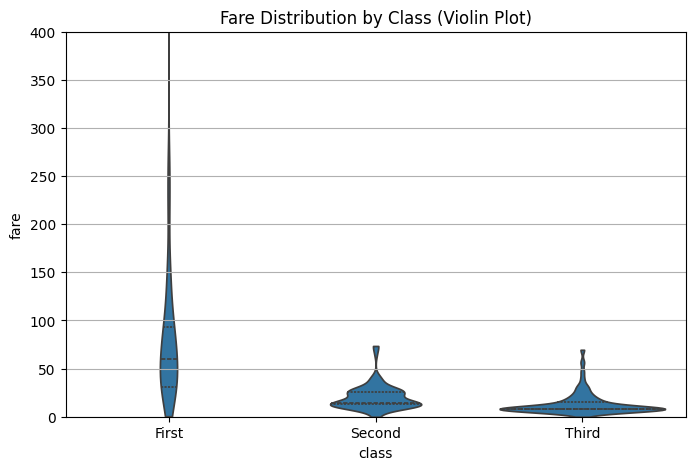

In [8]:
sns.violinplot(data=titanic, x='class', y='fare', inner='quartile', cut=0)
plt.title('Fare Distribution by Class (Violin Plot)')
plt.ylim(0, 400)
plt.show()

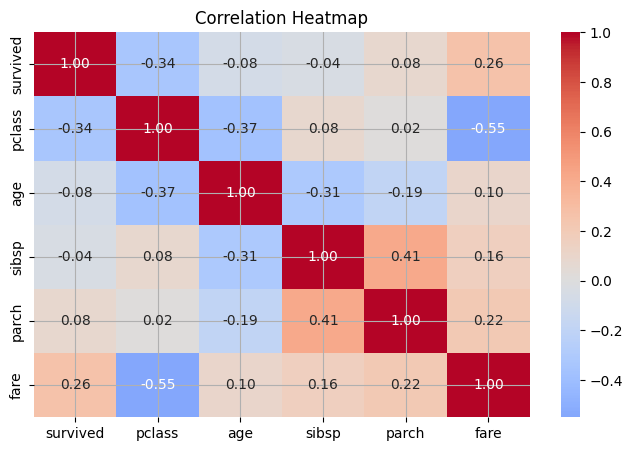

In [11]:
#correlation heatmap
num = titanic.select_dtypes(include=['number']) #select only numeric columns
sns.heatmap(num.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()  